In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
raw_data=pd.read_csv("/content/drive/My Drive/Project_Dataset.csv")
raw_data.columns=raw_data.columns.str.lower()


In [4]:
raw_data.describe()

,sample_id,charge_mode_distance,vehicle_id,operation_time,operation_distance,sender,gear_level_auto_time,gear_level_man_time,total_distance,brake_time,cruise_time,drive_distance,drive_fuel,drive_time,idle_fuel,coasting_time,econ_time,idle_time,key_on_time,pedal_time,measure35,measure36,measure37,measure38,measure39,measure40,measure41,measure42,measure43,measure44,measure45,measure46,measure47,measure48,measure49,measure_g-1_time,state_of_health_battery,diesel_mode_total_fuel,measure50,measure51,measure_3,electric_mode_time,hybrid_mode_time,charge_mode_time,diesel_mode_time,total_time,electric_mode_distance,hybrid_mode_distance,diesel_mode_distance,total_distance.1,battery_version,battery_generation,fleet_id,country,vehicle_mrk_type,emission_level,current_yearly_mileage,measure_2,active_charge,mounted_battery_generation,measure_1,measure_r_d,engine_type,geo_area,city,cluster,measure_row,is_bttery_changed,is_pattern_available,is_fleet_tof_monitored,is_checked_in_vda,is_battery_supplier_type2_faulty,is_vip_fleet,battery_supplier
count,8.619160e+05,238078.0,861916.000000,861815.000000,826697.000000,861916.000000,109882.000000,109906.00000,798851.000000,278583.000000,202469.000000,506445.000000,5.032910e+05,536956.000000,503274.000000,181441.000000,161594.000000,788100.000000,532004.000000,181251.000000,202294.000000,181269.000000,161567.000000,424111.000000,427152.000000,133646.000000,661906.000000,661922.000000,465493.000000,473534.000000,445570.000000,467305.000000,467216.000000,465362.000000,467094.000000,1.612370e+05,213860.000000,225385.000000,271163.000000,2.656360e+05,3.006480e+05,6.545090e+05,654104.000000,6.544760e+05,6.329780e+05,6.309890e+05,617031.000000,659976.000000,660637.000000,615662.000000,861916.000000,836463.000000,723818.000000,861915.000000,861916.000000,861916.000000,861916.00000,646879.000000,29631.000000,861837.000000,750973.000000,774348.000000,725789.000000,724928.000000,713059.000000,568613.000000,861916.000000,861916.000000,861916.000000,861916.000000,861916.000000,861916.000000,861916.000000,836463.000000
mean,1.605535e+08,0.0,914.695734,8950.790168,168684.138197,1.833639,6954.796127,0.02447,168093.327635,93.198303,2.318812,155092.674399,2.249406e+05,5370.606848,16964.597799,1178.372773,2942.647370,2422.450477,9982.880151,1569.209152,0.051096,46.385956,615.662478,0.901495,7573.258953,9.649170,169547.478055,61.481415,6781.350173,4809.420994,9.675092,2333.207444,0.275380,1476.301991,25.018116,9.916824e+02,82.849888,211.315261,2916.653578,2.188812e+03,2.200109e+06,2.559039e+03,9380.684591,3.872595e+01,1.705938e+01,1.219556e+04,6799.205918,186747.229050,68.730186,196896.154366,0.102657,1.746087,54.372580,4.280604,2.733117,1.330508,5.07670,1.085858,1.018157,1.700433,3.177602,11.733245,1.392464,1.224586,14.587535,2.591699,2017.983685,0.195157,0.047081,0.200031,0.344520,0.002894,0.042605,1.687913
std,1.040139e+08,0.0,907.401415,5888.556969,106473.041228,0.477447,6005.307955,2.41849,105243.858682,954.888471,677.038889,105134.455727,1.445176e+05,3587.547315,17560.201651,985.907388,2673.787443,2104.067300,6492.809635,1314.868734,13.441627,88.894753,1024.787936,23.071409,6860.789614,191.788297,106832.459806,129.885507,4535.185180,3429.560190,14.701637,1594.781897,2.416467,1208.234013,29.612928,9.885296e+03,13.765894,352.474578,2162.156577,2.528516e+03,1.608684e+06,2.062436e+03,5624.617100,1.475055e+03,1.499661e+03,7.896164e+03,6854.103732,104558.643889,148.490047,105712.507731,0.321870,1.073060,52.836068,4.214571,1.601607,0.470396,4.04253,0.280155,0.133520,0.979034,2.856095,15.647778,0.488367,0.806776,18.446428,1.489970,1375.534256,0.396322,0.211813,0.400024,0.475212,0.053714,0.201965,0.928517
min,1.673760e+06,0.0,1.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

In [ ]:
raw_data.info()

In [149]:
raw_data.shape

(861916, 76)

In [ ]:
raw_data["city"].groupby(raw_data["country"]).unique()#

In [ ]:
raw_data["country"].groupby(raw_data["geo_area"]).unique()#

### Data Prepration

Checking Duplicates with respect to Sample Id


In [ ]:
duplicateRowsDF = raw_data[raw_data["sample_id"].duplicated()].count()
print("Cheking redundancy with respect to Sample_id")
print(duplicateRowsDF)

In [7]:
duplocate_sample_id=raw_data.duplicated("sample_id").sum()
duplocate_sample_id

84449

* cleaning the dataset with respect to feature is_pattern_avaliable.
* this feature shows that data is logging or not
* so took the values having data logged as 1 

In [8]:
cleansed_data_on_pattern=raw_data[(raw_data["is_pattern_available"]==1) ]
cleansed_data_on_pattern.shape

(40580, 76)

 Finding the duplicates after above steps

In [9]:
duplicate_in_cleansed_data_pattern=cleansed_data_on_pattern.duplicated("sample_id").sum()
duplicate_in_cleansed_data_pattern

106

 Removed duplicates wrt two features battery version and Battery Changed


In [10]:
cleansed_data=cleansed_data_on_pattern[((cleansed_data_on_pattern["battery_version"]==0)
 & (cleansed_data_on_pattern["is_bttery_changed"]==0))
 | ((cleansed_data_on_pattern["battery_version"]==1) & (cleansed_data_on_pattern["is_bttery_changed"]==1))]

cleansed_data.shape

(40451, 76)

Stastical Summary

In [154]:
cleansed_data.shape

(40451, 76)

In [ ]:
cleansed_data.info()

In [ ]:
cleansed_data.describe()

Missing Data Analysis

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57]),
 <a list of 58 Text major ticklabel objects>)

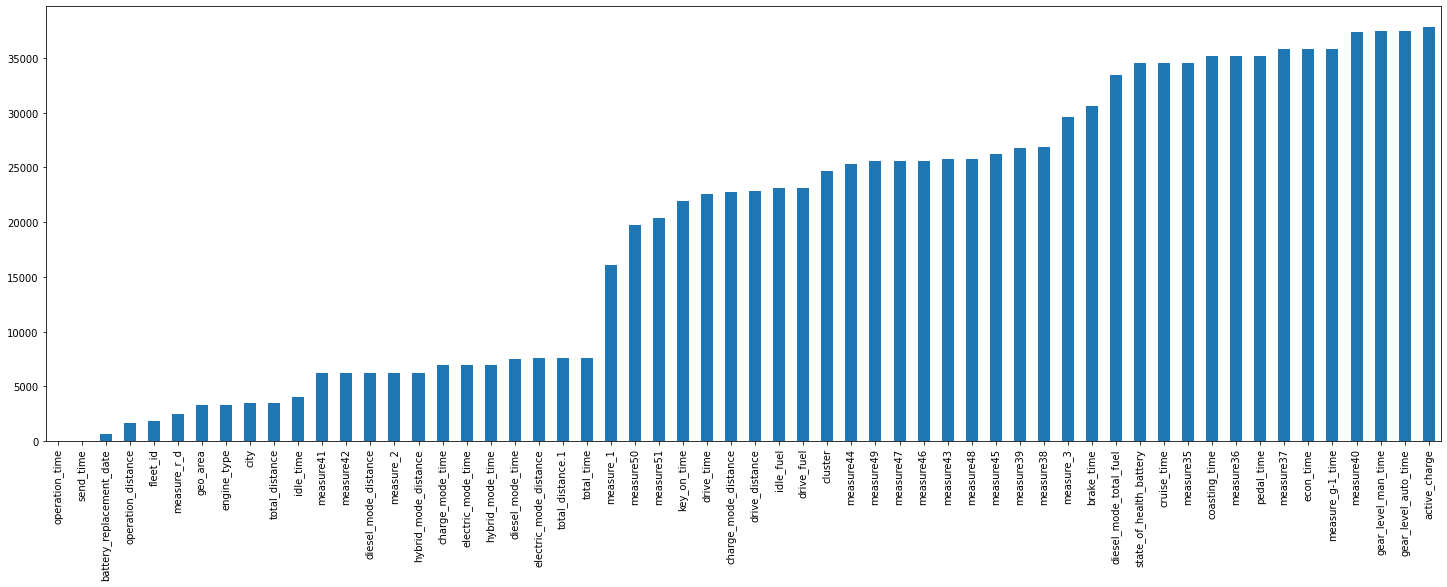

In [14]:

plt.figure(figsize=(25,8))
null_in = cleansed_data.isnull().sum()
null_in = null_in[null_in > 0]
null_in.sort_values(inplace=True)
null_in.plot.bar()
plt.xticks(rotation=90)

In [ ]:

total = cleansed_data.isnull().sum().sort_values(ascending=False)
percent = (cleansed_data.isnull().sum()/cleansed_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(60)

Missing Data Handling

Here, we are doing data imputation. If the number of missing values is more than 16112 around 40%, we drop the column from the analysis.

In [11]:
data_len = cleansed_data.shape[0]


for col in cleansed_data.columns.values:
    missing_values = cleansed_data[col].isnull().sum()

   
    if missing_values > 16112:
        cleansed_data = cleansed_data.drop(col, axis = 1)
    

In [156]:
cleansed_data.shape

(40451, 42)

In [ ]:
cleansed_data.tail()

Split dataframe into numeric and categorical

In [12]:
numeric_features=cleansed_data.loc[:,["electric_mode_distance","hybrid_mode_distance","diesel_mode_distance","total_distance.1","operation_time","operation_distance","total_distance","idle_time","measure41","measure42","electric_mode_time","hybrid_mode_time","charge_mode_time","diesel_mode_time","total_time"]]

In [158]:
numeric_features.shape

(40451, 15)

In [13]:
catagorical_features=cleansed_data.loc[:,["vehicle_id","sender","battery_version", 'battery_generation',"country","emission_level","mounted_battery_generation","engine_type","geo_area",'city', 'is_bttery_changed',"battery_supplier","is_vip_fleet","is_battery_supplier_type2_faulty","is_checked_in_vda","is_fleet_tof_monitored","is_pattern_available","measure_row","measure_r_d","measure_1","measure_2","current_yearly_mileage","vehicle_mrk_type","fleet_id"]]

In [160]:
catagorical_features.shape

(40451, 24)

Outlier checking

In [ ]:
plt.figure(figsize=(30, 10))
sns.boxplot(data=numeric_features)
plt.title("Numerical features outlier");

In [24]:
timefeatures=numeric_features.loc[:,["electric_mode_time","hybrid_mode_time","charge_mode_time","diesel_mode_time","idle_time","operation_time","total_time"]]

In [ ]:
plt.figure(figsize=(20, 5))
sns.boxplot(data=timefeatures)
plt.title("Time features outlier");

In [161]:
distancefeatures=numeric_features.loc[:,["electric_mode_distance","hybrid_mode_distance","diesel_mode_distance","total_distance.1","operation_distance","total_distance"]]

In [ ]:
plt.figure(figsize=(20, 5))
sns.boxplot(data=distancefeatures)
plt.title("Distance features outlier");

Outlier removing

In [14]:

median = numeric_features.loc[numeric_features['operation_distance']<600000, 'operation_distance'].median()
numeric_features.loc[numeric_features["operation_distance"] > 600000, 'operation_distance'] = np.nan
numeric_features.fillna(median)

median = numeric_features.loc[numeric_features['total_distance']<600000, 'total_distance'].median()
numeric_features.loc[numeric_features["total_distance"] > 600000, 'total_distance'] = np.nan
numeric_features.fillna(median)

,electric_mode_distance,hybrid_mode_distance,diesel_mode_distance,total_distance.1,operation_time,operation_distance,total_distance,idle_time,measure41,measure42,electric_mode_time,hybrid_mode_time,charge_mode_time,diesel_mode_time,total_time
19806,673.820,37906.789,3.930,38584.539,2176.729,37962.639,37962.639,874.037,37906.789,3.930,575.997000,2154.912000,5.942,8.877000,2745.728000
19807,693.680,39118.009,4.680,39816.369,2216.488,39176.579,39176.579,882.380,39118.009,4.680,591.379000,2193.720000,5.992,9.523000,2800.614000
19808,67.430,10629.860,0.090,10697.380,319.862,10634.430,10634.430,116.418,10629.860,0.090,65.530000,314.814000,1.616,3.772000,385.732000
19809,162.100,16022.820,0.600,16185.520,556.737,16031.620,16031.620,205.049,16022.820,0.600,154.174000,548.342000,3.084,4.603000,710.203000
19810,693.680,39118.009,4.680,39816.369,2216.488,39176.579,39176.579,882.380,39118.009,4.680,591.379000,2193.720000,5.992,9.523000,2800.614000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861908,0.000,7.640,0.000,7.640,4.926,7.640,7.640,4.378,7.640,0.000,0.000000,4.380000,0.000,0.709000,5.089000
861909,212613.575,212613.575,212613.575,212613.575,13681.235,321259.403,321259.403,4187.617,212613.575,212613.575,212613.575000,212613.575000,212613.575,212613.575000,212613.575000
861911,0.030,6.800,4.550,11.380,4.520,11.360,11.360,3.260,6.800,4.550,0.160000,1.600000,0.010,6.310000,8.080000
861913,0.210,13.210,4.680,18.100,15.085,17.890,17.890,13.877,13.210,4.680,1.524000,12.333000,0.030,4.567000,18.454000


In [15]:

median = numeric_features.loc[numeric_features['operation_time']<32000, 'operation_time'].median()
numeric_features.loc[numeric_features["operation_time"] > 32000, 'operation_time'] = np.nan
numeric_features.fillna(median)


,electric_mode_distance,hybrid_mode_distance,diesel_mode_distance,total_distance.1,operation_time,operation_distance,total_distance,idle_time,measure41,measure42,electric_mode_time,hybrid_mode_time,charge_mode_time,diesel_mode_time,total_time
19806,673.8200,37906.7890,3.9300,38584.5390,2176.729,37962.639,37962.6390,874.0370,37906.7890,3.9300,575.997000,2154.912000,5.9420,8.877000,2745.728000
19807,693.6800,39118.0090,4.6800,39816.3690,2216.488,39176.579,39176.5790,882.3800,39118.0090,4.6800,591.379000,2193.720000,5.9920,9.523000,2800.614000
19808,67.4300,10629.8600,0.0900,10697.3800,319.862,10634.430,10634.4300,116.4180,10629.8600,0.0900,65.530000,314.814000,1.6160,3.772000,385.732000
19809,162.1000,16022.8200,0.6000,16185.5200,556.737,16031.620,16031.6200,205.0490,16022.8200,0.6000,154.174000,548.342000,3.0840,4.603000,710.203000
19810,693.6800,39118.0090,4.6800,39816.3690,2216.488,39176.579,39176.5790,882.3800,39118.0090,4.6800,591.379000,2193.720000,5.9920,9.523000,2800.614000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861908,0.0000,7.6400,0.0000,7.6400,4.926,7.640,7.6400,4.3780,7.6400,0.0000,0.000000,4.380000,0.0000,0.709000,5.089000
861909,12194.3335,12194.3335,12194.3335,12194.3335,13681.235,321259.403,321259.4030,4187.6170,12194.3335,12194.3335,12194.333500,12194.333500,12194.3335,12194.333500,12194.333500
861911,0.0300,6.8000,4.5500,11.3800,4.520,11.360,11.3600,3.2600,6.8000,4.5500,0.160000,1.600000,0.0100,6.310000,8.080000
861913,0.2100,13.2100,4.6800,18.1000,15.085,17.890,17.8900,13.8770,13.2100,4.6800,1.524000,12.333000,0.0300,4.567000,18.454000


In [ ]:
plt.figure(figsize=(30, 10))
sns.boxplot(data=numeric_features)
plt.title("Numerical features outlier");

Check numerical features distribution



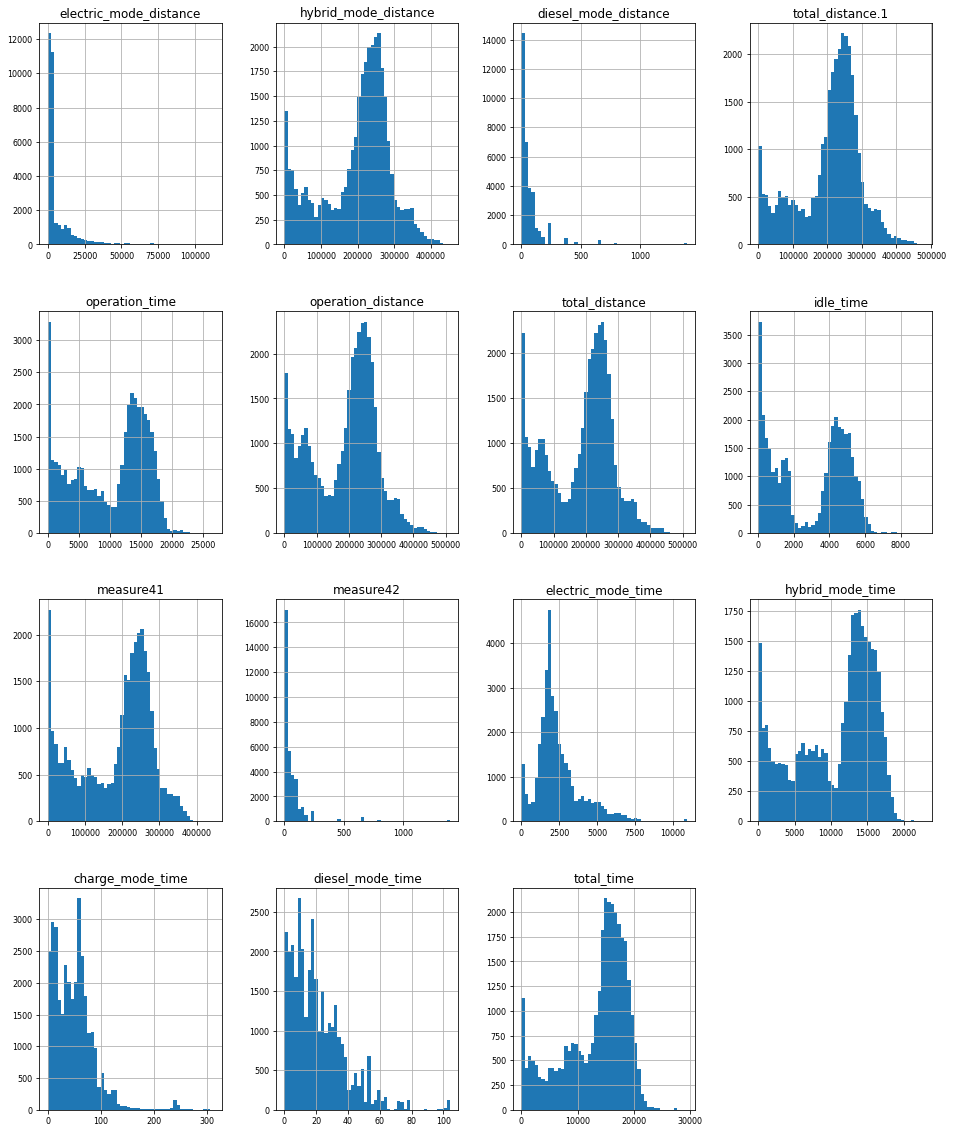

In [31]:
numeric_features.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

After checking the distribution, we are going to take median because features have positive or negative skewness.

Treating missing values by taking median of numeric data

Missing data imputation on numerical data

In [16]:
numeric_features.dropna()
mean_val=round(numeric_features.median(),0)
numeric_features=numeric_features.fillna(mean_val)
mean_val=round(numeric_features.median(),0)
mean_val

electric_mode_distance      2572.0
hybrid_mode_distance      223271.0
diesel_mode_distance          35.0
total_distance.1          228742.0
operation_time             12194.0
operation_distance        212777.0
total_distance            212614.0
idle_time                   3719.0
measure41                 215713.0
measure42                     29.0
electric_mode_time          2040.0
hybrid_mode_time           12600.0
charge_mode_time              47.0
diesel_mode_time              18.0
total_time                 15007.0
dtype: float64

In [18]:
numeric_features.isnull().sum()

electric_mode_distance    0
hybrid_mode_distance      0
diesel_mode_distance      0
total_distance.1          0
operation_time            0
operation_distance        0
total_distance            0
idle_time                 0
measure41                 0
measure42                 0
electric_mode_time        0
hybrid_mode_time          0
charge_mode_time          0
diesel_mode_time          0
total_time                0
dtype: int64

Missing data imputation on catagorical features

In [17]:
catagorical_features.isnull().sum()

vehicle_id                              0
sender                                  0
battery_version                         0
battery_generation                      0
country                                 0
emission_level                          0
mounted_battery_generation              0
engine_type                          3264
geo_area                             3264
city                                 3490
is_bttery_changed                       0
battery_supplier                        0
is_vip_fleet                            0
is_battery_supplier_type2_faulty        0
is_checked_in_vda                       0
is_fleet_tof_monitored                  0
is_pattern_available                    0
measure_row                             0
measure_r_d                          2452
measure_1                           16112
measure_2                            6255
current_yearly_mileage                  0
vehicle_mrk_type                        0
fleet_id                          

In [19]:

catagorical_features.dropna()
mode_eng=catagorical_features["engine_type"].mode()
mode_cty=catagorical_features["city"].mode()
mode_geo=catagorical_features["geo_area"].mode()
mode_mrd=catagorical_features["measure_r_d"].mode()
mode_m1=catagorical_features["measure_1"].mode()
mode_m2=catagorical_features["measure_2"].mode()
mode_fid=catagorical_features["fleet_id"].mode()


catagorical_features["engine_type"]=catagorical_features["engine_type"].fillna(mode_eng[0])
catagorical_features["geo_area"]=catagorical_features["geo_area"].fillna(mode_geo[0])
catagorical_features["city"]=catagorical_features["city"].fillna(mode_cty[0])
catagorical_features["measure_r_d"]=catagorical_features["measure_r_d"].fillna(mode_mrd[0])
catagorical_features["measure_1"]=catagorical_features["measure_1"].fillna(mode_m1[0])
catagorical_features["measure_2"]=catagorical_features["measure_2"].fillna(mode_m2[0])
catagorical_features["fleet_id"]=catagorical_features["fleet_id"].fillna(mode_fid[0])


catagorical_features.isnull().sum()


vehicle_id                          0
sender                              0
battery_version                     0
battery_generation                  0
country                             0
emission_level                      0
mounted_battery_generation          0
engine_type                         0
geo_area                            0
city                                0
is_bttery_changed                   0
battery_supplier                    0
is_vip_fleet                        0
is_battery_supplier_type2_faulty    0
is_checked_in_vda                   0
is_fleet_tof_monitored              0
is_pattern_available                0
measure_row                         0
measure_r_d                         0
measure_1                           0
measure_2                           0
current_yearly_mileage              0
vehicle_mrk_type                    0
fleet_id                            0
dtype: int64

Numerical feature selection using pearson corelation

Text(0.5, 1.0, 'Correlation between features')

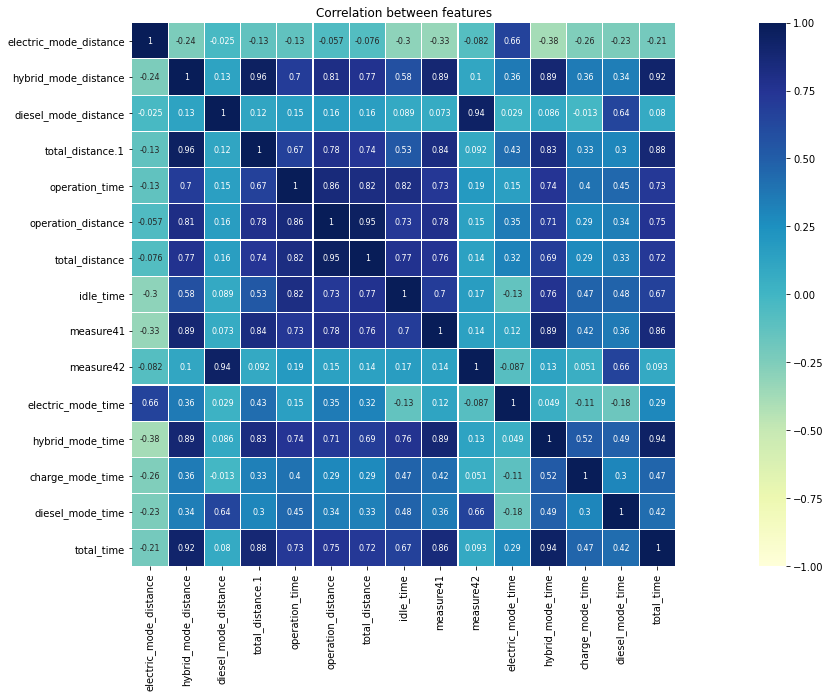

In [21]:

import matplotlib.pyplot as plt
corr=numeric_features.corr()
plt.figure(figsize=(30, 10))

sns.heatmap(corr[(corr >= 0) | (corr <= -0)], 
            cmap='YlGnBu', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);
plt.title('Correlation between features')

After analyse of corelation heat map, it shows that features are corelate with each othr, so we are applying pca for feature selection.



Mean Normalization on numerical features

In [167]:
numeric_features = ((numeric_features - numeric_features.mean())/(numeric_features.max() - numeric_features.min()))
numeric_features.describe()

,electric_mode_distance,hybrid_mode_distance,diesel_mode_distance,total_distance.1,operation_time,operation_distance,total_distance,idle_time,measure41,measure42,electric_mode_time,hybrid_mode_time,charge_mode_time,diesel_mode_time,total_time
count,4.045100e+04,4.045100e+04,4.045100e+04,4.045100e+04,4.045100e+04,4.045100e+04,4.045100e+04,4.045100e+04,4.045100e+04,4.045100e+04,4.045100e+04,4.045100e+04,4.045100e+04,4.045100e+04,4.045100e+04
mean,1.070189e-15,4.155463e-15,2.388552e-15,1.870858e-15,2.563313e-15,-1.711410e-15,1.336868e-15,2.020090e-15,-8.247724e-16,2.839553e-15,-4.292249e-15,5.509534e-17,-1.560662e-16,1.094417e-15,2.372786e-16
std,9.908463e-02,1.918326e-01,9.365172e-02,1.718876e-01,2.229630e-01,1.922130e-01,1.886271e-01,2.094316e-01,2.076711e-01,8.939351e-02,1.234059e-01,2.182344e-01,1.120349e-01,1.447816e-01,1.750262e-01
min,-5.644701e-02,-4.471042e-01,-5.026865e-02,-4.424590e-01,-3.726821e-01,-3.628565e-01,-3.626165e-01,-3.208072e-01,-4.217638e-01,-4.295566e-02,-2.147154e-01,-4.805490e-01,-1.579713e-01,-1.946329e-01,-4.596673e-01
25%,-3.728717e-02,-6.278824e-02,-3.873816e-02,-4.389234e-02,-2.107136e-01,-1.755174e-01,-1.628288e-01,-2.198469e-01,-1.458899e-01,-3.692351e-02,-6.184540e-02,-1.465182e-01,-7.705136e-02,-9.964873e-02,-6.608288e-02
50%,-3.350574e-02,4.543663e-02,-2.512271e-02,3.487389e-02,8.432274e-02,5.148138e-02,5.140397e-02,7.922869e-02,6.316680e-02,-2.212046e-02,-2.846271e-02,7.323476e-02,-7.320362e-03,-2.188591e-02,4.947669e-02
75%,-2.256954e-02,1.140160e-01,1.812180e-03,9.382667e-02,1.884181e-01,1.347400e-01,1.279539e-01,1.750891e-01,1.393493e-01,2.709361e-03,3.010613e-02,1.507581e-01,4.530374e-02,5.668040e-02,1.094498e-01
max,9.435530e-01,5.528958e-01,9.497314e-01,5.575410e-01,6.273179e-01,6.371435e-01,6.373835e-01,6.791928e-01,5.782362e-01,9.570443e-01,7.852846e-01,5.194510e-01,8.420287e-01,8.053671e-01,5.403327e-01


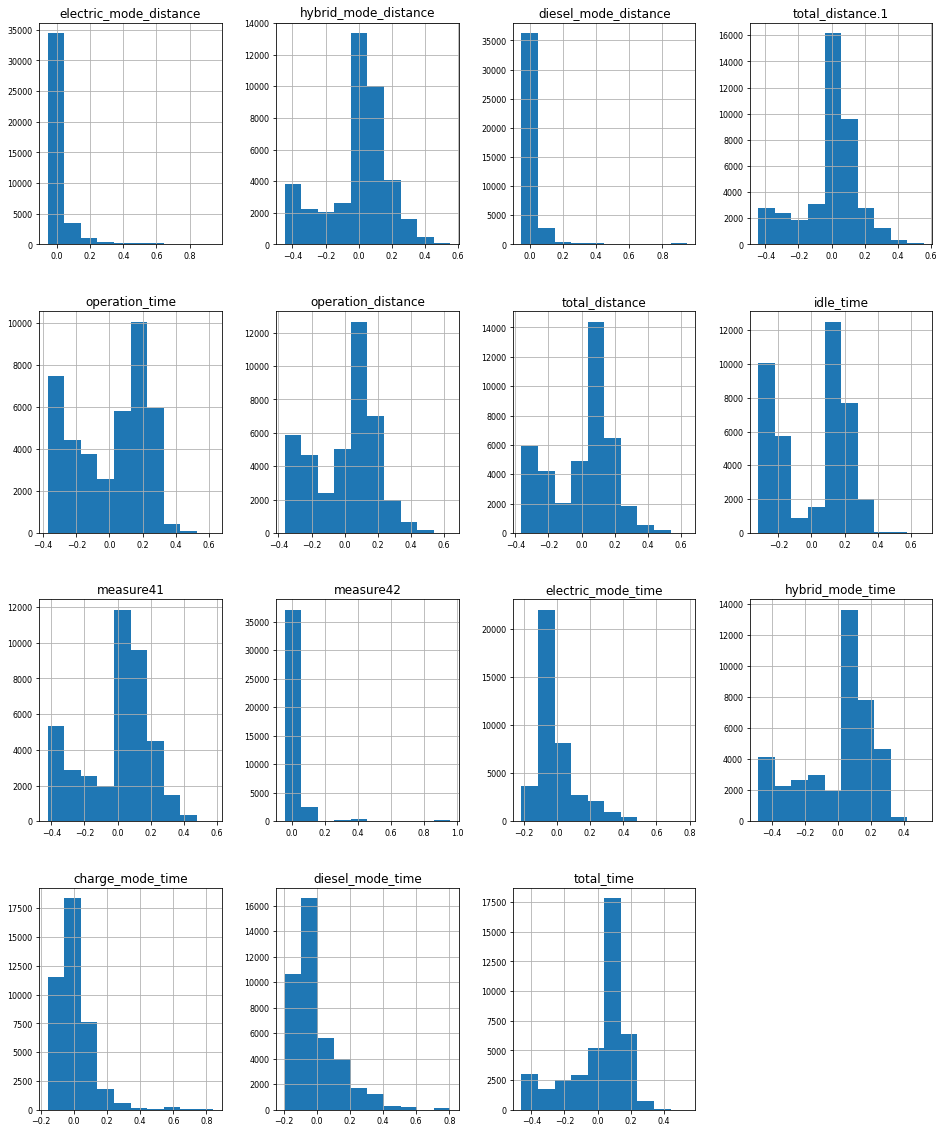

In [168]:
numeric_features.hist(figsize=(16, 20),xlabelsize=8, ylabelsize=8);

### Exploratory Analysis

On Raw Data

In [ ]:
plt.title('On Raw Data')
sns.countplot("battery_supplier",hue="battery_generation",data=raw_data)

After cleaning data

In [ ]:
plt.title('After cleaning data')
sns.countplot("battery_supplier",hue="battery_generation",data=cleansed_data)

On raw data

In [ ]:
sns.countplot("battery_generation",hue="battery_supplier",data=raw_data)

After cleaning data

In [ ]:
sns.countplot("battery_generation",hue="battery_supplier",data=cleansed_data)

on raw data

In [ ]:
plt.title('On Raw Data')
sns.countplot("engine_type",hue="battery_supplier",data=raw_data)#[(raw_data["engine_type"]==1)])

After cleaning data

In [ ]:
plt.title('After Cleaning Data')
sns.countplot("engine_type",hue="battery_supplier",data=cleansed_data)

In [20]:

newdata = pd.concat([numeric_features, catagorical_features], axis=1)
newdata.shape

(40451, 39)

### Machine Learning Modeling and Evaluation

Define the Regression problem : Predicting the Operation time using Regression Algorithms.

Applying correlation of all columns with operation_time

In [171]:

data_operation=pd.DataFrame(newdata.loc[:, newdata.corr()['operation_time'] > 0.2])
data_operation.reset_index(inplace=False)
data_operation.columns

Index(['hybrid_mode_distance', 'total_distance.1', 'operation_time',
       'operation_distance', 'total_distance', 'idle_time', 'measure41',
       'hybrid_mode_time', 'charge_mode_time', 'diesel_mode_time',
       'total_time', 'sender', 'battery_generation', 'emission_level',
       'mounted_battery_generation', 'engine_type', 'battery_supplier',
       'measure_row', 'current_yearly_mileage'],
      dtype='object')

In [47]:
targetr=data_operation["operation_time"]
numeric_features=data_operation.drop(labels="operation_time",axis=1)

Modelling Without PCA 

In [80]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(numeric_features, targetr, test_size = 0.30, random_state=42)
print("x_train ",x_train.shape)
print("x_test ",x_test.shape)
print("y_train ",y_train.shape)
print("y_test ",y_test.shape)

x_train  (28315, 15)
x_test  (12136, 15)
y_train  (28315,)
y_test  (12136,)


Linear Regression

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
model=LinearRegression()
model.fit(x_train,y_train)
predicted=model.predict(x_test)
print("mean square error: %.2f " %mean_squared_error(y_test,predicted))
print("r square score: %.2f" %r2_score(y_test,predicted))

mean square error: 0.01 
r square score: 0.88


Supoort vector regression

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf', C=1e3, gamma = 0.5)
regressor.fit(x_train,y_train)
predicted=regressor.predict(x_test)
print("mean square error: %.2f " %mean_squared_error(y_test,predicted))
print("r square score: %.2f" %r2_score(y_test,predicted))

Applying PCA 

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
principalComponents = pca.fit_transform(numeric_features)

Data Spliting

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(principalComponents, targetr, test_size = 0.30, random_state=40)
print("x_train ",x_train.shape)
print("x_test ",x_test.shape)
print("y_train ",y_train.shape)
print("y_test ",y_test.shape)

Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
model=LinearRegression()
model.fit(x_train,y_train)
predicted=model.predict(x_test)
print("mean square error: %.2f " %mean_squared_error(y_test,predicted))
print("r square score: %.2f" %r2_score(y_test,predicted))

Supoort vector regression

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf', C=1e3, gamma = 0.5)
regressor.fit(x_train,y_train)
predicted=regressor.predict(x_test)
print("mean square error: %.2f " %mean_squared_error(y_test,predicted))
print("r square score: %.2f" %r2_score(y_test,predicted))

Hyperparameyer tuning 

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
model = LinearRegression()
param_grid = { 
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

grid_battery = GridSearchCV(model, param_grid)
grid_battery.fit(, targetr)


prediction_battery = grid_battery.predict(x_test)
forest_score_battery=grid_battery.score(x_test, y_test)
print('The random forest params best:',grid_battery.best_params_)
print('The random forest score:', forest_score_battery)

Classification problem : Prediction of multiclass classification feature ‘Battery Supplier’.

Applying correlation on all columns with respect to Battery Supplier

In [ ]:

data_battery=pd.DataFrame(newdata.loc[:, newdata.corr()['battery_supplier'] > 0.3])
data_battery.reset_index(inplace=True)
data_battery.columns

In [ ]:
targetc=data_battery["battery_supplier"]
catagorical_features1=data_battery.drop(labels="battery_supplier",axis=1)

Without handling the imbalance data

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(catagorical_features1, targetc, test_size = 0.30, random_state=40)
print("x_train ",x_train.shape)
print("x_test ",x_test.shape)
print("y_train ",y_train.shape)
print("y_test ",y_test.shape)

Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
model_lr = LogisticRegression(random_state=5)
model_lr.fit(x_train, y_train)
y_pred = model_lr.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy",accuracy)
from sklearn.metrics import confusion_matrix
cm =confusion_matrix(y_test, y_pred)
print("Confusion_matrix",cm)
pred_svm = model_lr.predict(x_test)
print("Accuracy Logistic Regression %s" % accuracy_score(pred_svm,y_test))
print(classification_report(y_test,pred_svm))





Support Vector Machine

In [ ]:
from sklearn.svm import SVC
regressor = SVC(kernel='rbf', C=1e3, gamma = 0.5)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)

print("Accuracy",accuracy)
from sklearn.metrics import confusion_matrix
cm =confusion_matrix(y_test, y_pred)
print("Confusion_matrix",cm)
pred_svm = regressor.predict(x_test)
print("Accuracy SVC %s" % accuracy_score(pred_svm,y_test))
print(classification_report(y_test,pred_svm))
#([[TP, FP],
#  [FN, TN]]

Applying SMOTE for oversampling in classification and PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(catagorical_features1)

In [ ]:
sns.countplot(targetc)
plt.title("Battery_supplier imbalance")

In [ ]:

from imblearn.over_sampling import SMOTE
from collections import Counter
X_sm, y_sm = SMOTE().fit_resample(catagorical_features1,targetc)
print(sorted(Counter(y_sm).items()))

In [ ]:
sns.countplot(y_sm)
plt.title("Data Balanced")
plt.xlabel('Battery_supplier')

splitting catagorical features into train or test




In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.30, random_state=40)
print("x_train ",x_train.shape)
print("x_test ",x_test.shape)
print("y_train ",y_train.shape)
print("y_test ",y_test.shape)

Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
model_lr1 = LogisticRegression(random_state=5)
model_lr1.fit(x_train, y_train)
y_pred = model_lr1.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy",accuracy)
from sklearn.metrics import confusion_matrix
cm =confusion_matrix(y_test, y_pred)
print("Confusion_matrix",cm)
pred_svm = model_lr1.predict(x_test)
print("Accuracy Logistic Regression %s" % accuracy_score(pred_svm,y_test))
print(classification_report(y_test,pred_svm))







Support Vector Machine

In [ ]:
from sklearn.svm import SVC
regressor1 = SVC(kernel='rbf', C=1e3, gamma = 0.5)
regressor1.fit(x_train, y_train)
y_pred = regressor1.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
#accuracy_score(y_test,y_pred)
#y_pred = model.predict(x_test)
#y_pred=pd.DataFrame(y_pred)
print("Accuracy",accuracy)
from sklearn.metrics import confusion_matrix
cm =confusion_matrix(y_test, y_pred)
print("Confusion_matrix",cm)
pred_svm = regressor1.predict(x_test)
print("Accuracy SVC %s" % accuracy_score(pred_svm,y_test))
print(classification_report(y_test,pred_svm))


Hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model_params = { 
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}

grid_battery = GridSearchCV(model, model_params)
grid_battery.fit(X_train, y_train)

prediction_battery = grid_battery.predict(X_test)
forest_score_battery=grid_battery.score(X_test, y_test)
print('The random forest params best:',grid_battery.best_params_)
print('The random forest score:', forest_score_battery)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
clf = GridSearchCV(svm.SVC(gamma='auto'), {
    'C': [1,10,20],
    'kernel': ['rbf','linear']
}, cv=5, return_train_score=False)
clf.fit(y_test, y_pred)
clf.cv_results_

# Unsupervised Problem: Anomaly Detection on Engine type using K-means Clustering Algorithm

Applying correlation on all columns with respect to Engine type

In [111]:

data_vehicle=pd.DataFrame(newdata.loc[:, newdata.corr()['engine_type'] > 0.20])
data_vehicle.reset_index(inplace=True)
data_vehicle.columns

Index(['index', 'hybrid_mode_distance', 'total_distance.1', 'operation_time',
       'operation_distance', 'total_distance', 'idle_time', 'measure41',
       'hybrid_mode_time', 'charge_mode_time', 'diesel_mode_time',
       'total_time', 'vehicle_id', 'sender', 'battery_generation',
       'emission_level', 'mounted_battery_generation', 'engine_type',
       'battery_supplier', 'measure_row', 'measure_1',
       'current_yearly_mileage', 'vehicle_mrk_type'],
      dtype='object')

In [22]:

data_vehicle=pd.DataFrame(newdata.loc[:, newdata.corr()['operation_time'] > 0.20])
data_vehicle.reset_index(inplace=True)
data_vehicle.columns

Index(['index', 'hybrid_mode_distance', 'total_distance.1', 'operation_time',
       'operation_distance', 'total_distance', 'idle_time', 'measure41',
       'hybrid_mode_time', 'charge_mode_time', 'diesel_mode_time',
       'total_time', 'sender', 'battery_generation', 'emission_level',
       'mounted_battery_generation', 'engine_type', 'battery_supplier',
       'measure_row', 'current_yearly_mileage'],
      dtype='object')

In [23]:
y=data_vehicle[['operation_time','operation_distance']]
x =data_vehicle.loc[:,['index', 'hybrid_mode_distance', 'total_distance.1', 'operation_time',
       'operation_distance', 'total_distance', 'idle_time', 'measure41',
       'hybrid_mode_time', 'charge_mode_time', 'diesel_mode_time',
       'total_time', 'sender', 'battery_generation', 'emission_level',
       'mounted_battery_generation', 'engine_type', 'battery_supplier',
       'measure_row', 'current_yearly_mileage']]

In [ ]:
#y=newdata.iloc[:,[13,4]]

In [24]:
#X = newdata.iloc[:, [14,13,12,10,9,0,1,2,3,4,5]].values
X=newdata[['vehicle_id','operation_time', 'operation_distance']]
#X = newdata.iloc[:, [13,12,10,9,0,1,2,3,4,5]].values
#Y=newdata.iloc[:,14]

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x,y)

Text(0, 0.5, 'Features')

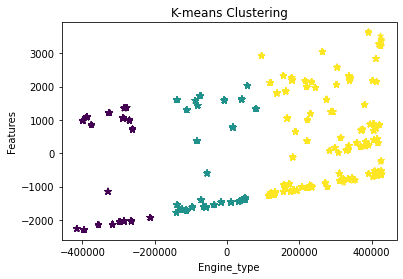

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

data = principalComponents
# kmeans model k = 3
km = KMeans(n_clusters = 3)
clusters=km.fit_predict(data)
# plotting
plt.scatter(*zip(*data),c=clusters,marker ="*")
plt.title('K-means Clustering')
plt.xlabel('Engine_type')
plt.ylabel('Features')

In [ ]:
# finding centers of clusters
centroids = km.cluster_centers_

points = np.empty((0,len(data[0])), float)

distances = np.empty((0,len(data[0])), float)

for i, center_elem in enumerate(centroids):
  
    distances = np.append(distances, cdist([center_elem],data[clusters == i], 'euclidean')) 
    points = np.append(points, data[clusters == i], axis=0)

In [ ]:
km.cluster_centers_

In [ ]:
print("Inertia is", km.inertia_)

In [ ]:
#99,80,50
percentile = 80

outliers = points[np.where(distances > np.percentile(distances, percentile))]

In [ ]:

plt.figure(figsize=(20, 10))


plt.scatter(*zip(*data),c=clusters,marker = 'x',s=150,label="Clusters") 

plt.scatter(*zip(*outliers),marker='X',facecolor='None',edgecolor='r',s=15,label="Outliers");

plt.scatter(*zip(*centroids),marker='o',facecolor='b',edgecolor='b',s=200,label="Centroid");
plt.legend()
plt.title('K-means Clustering Anomaly Detection with ['percentile'] Threshold')
plt.xlabel('Vehicle_id')
plt.ylabel('Features')

In [ ]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(x)
    sse.append(km.inertia_)
plt.figure(figsize=(30, 10))

plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [ ]:
from sklearn.ensemble import IsolationForest
rs=np.random.RandomState(0)
clf = IsolationForest(max_samples=100,random_state=rs, contamination=.1) 
clf.fit(X)
if_scores = clf.decision_function(X)
if_anomalies=clf.predict(X)
if_anomalies=pd.Series(if_anomalies).replace([-1,1],[1,0])
#if_anomalies=X [if_anomalies==1];

In [ ]:
plt.figure(figsize=(12,8))
plt.hist(if_scores);
plt.title(‘Histogram of Avg Anomaly Scores: Lower => More Anomalous’);

In [ ]:
cmap=np.array(['white','red'])
plt.scatter(df.iloc[:,1],df.iloc[:,2],c='white',s=20,edgecolor='k')
plt.scatter(if_anomalies.iloc[:,0],if_anomalies.iloc[:,1],c='red')
plt.xlabel('Engine Typee')
plt.ylabel('Spend_Score')
plt.title('Isolation Forests - Anomalies')

In [142]:
data_vehicle=pd.DataFrame(newdata.loc[:, newdata.corr()['engine_type'] >= 0])
data_vehicle.reset_index(inplace=True)
data_vehicle.columns

Index(['index', 'hybrid_mode_distance', 'diesel_mode_distance',
       'total_distance.1', 'operation_time', 'operation_distance',
       'total_distance', 'idle_time', 'measure41', 'measure42',
       'hybrid_mode_time', 'charge_mode_time', 'diesel_mode_time',
       'total_time', 'vehicle_id', 'sender', 'battery_version',
       'battery_generation', 'emission_level', 'mounted_battery_generation',
       'engine_type', 'is_bttery_changed', 'battery_supplier', 'measure_row',
       'measure_1', 'current_yearly_mileage', 'vehicle_mrk_type', 'fleet_id'],
      dtype='object')

In [30]:
##Task 3(b)

In [40]:
data_vehicle=pd.DataFrame(newdata.loc[:, newdata.corr()['operation_time'] > 0.20])
data_vehicle.reset_index(inplace=True)
data_vehicle.columns

Index(['index', 'hybrid_mode_distance', 'total_distance.1', 'operation_time',
       'operation_distance', 'total_distance', 'idle_time', 'measure41',
       'hybrid_mode_time', 'charge_mode_time', 'diesel_mode_time',
       'total_time', 'sender', 'battery_generation', 'emission_level',
       'mounted_battery_generation', 'engine_type', 'battery_supplier',
       'measure_row', 'current_yearly_mileage'],
      dtype='object')

In [41]:
y=data_vehicle[['operation_time','operation_distance']]
x =data_vehicle.loc[:,['index', 'hybrid_mode_distance', 'total_distance.1', 'operation_time',
       'operation_distance', 'total_distance', 'idle_time', 'measure41',
       'hybrid_mode_time', 'charge_mode_time', 'diesel_mode_time',
       'total_time', 'sender', 'battery_generation', 'emission_level',
       'mounted_battery_generation', 'engine_type', 'battery_supplier',
       'measure_row', 'current_yearly_mileage']]

In [69]:
#X = newdata.iloc[:, [14,13,12,10,9,0,1,2,3,4,5]].values
X=newdata[['vehicle_id','operation_time', 'operation_distance']]
#X = newdata.iloc[:, [13,12,10,9,0,1,2,3,4,5]].values
#Y=newdata.iloc[:,14]

In [43]:
print(X)

        vehicle_id  operation_time  operation_distance
19806           20        2176.729           37962.639
19807           20        2216.488           39176.579
19808           20         319.862           10634.430
19809           20         556.737           16031.620
19810           20        2216.488           39176.579
...            ...             ...                 ...
861908        4025           4.926               7.640
861909        4025       13681.235          321259.403
861911        4027           4.520              11.360
861913        4029          15.085              17.890
861914        4030           0.000               0.000

[40451 rows x 3 columns]


In [70]:
from sklearn.ensemble import IsolationForest
max_features=1.0
n_estimators=50
max_samples='auto'
contamination=float(0.2)
forest_model=IsolationForest(max_features = max_features, n_estimators=n_estimators, max_samples=max_samples, contamination=contamination)
forest_model.fit(X[['operation_time','operation_distance']])


IsolationForest(behaviour='deprecated', bootstrap=False, contamination=0.2,
                max_features=1.0, max_samples='auto', n_estimators=50,
                n_jobs=None, random_state=None, verbose=0, warm_start=False)

In [97]:
X['scores']=forest_model.decision_function(X[['operation_time','operation_distance']])
X['anomaly_Value']=forest_model.predict(X[['operation_time', 'operation_distance']])

X.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,vehicle_id,operation_time,operation_distance,scores,anomaly_Value
19806,20,2176.729,37962.639,0.026824,1
19807,20,2216.488,39176.579,0.029482,1
19808,20,319.862,10634.430,-0.014339,-1
19809,20,556.737,16031.620,-0.003452,-1
19810,20,2216.488,39176.579,0.029482,1


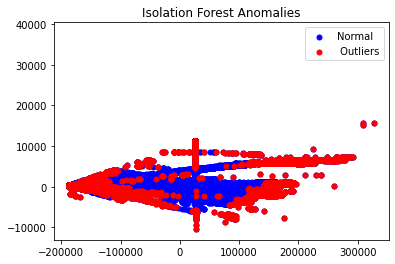

In [90]:
from sklearn.decomposition import PCA
X_Pca = PCA(2)
X_Pca.fit(X)
df2=pd.DataFrame(pca.transform(X))
nparry = np.array(df2)
plt.title("Isolation Forest Anomalies")
plt.contourf( nparry, cmap=plt.cm.Blues_r)
plt1 = plt.scatter(df2[0], df2[1], c='blue',
                 s=25,label="Normal",cmap="jet")
plt1 =plt.scatter(df2.iloc[outlier_index,0],df2.iloc[outlier_index,1], c='red',s=25,label=" Outliers")
plt.legend(loc="upper right")
plt.show()

In [98]:
Outlier = len(X[X['operation_time'] < ] )
Outlier

36

In [60]:
from sklearn.ensemble import IsolationForest

clf=IsolationForest(n_estimators=100, max_samples='auto', contamination=float(.12), 
                        max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)
clf.fit(X)

IsolationForest(behaviour='deprecated', bootstrap=False, contamination=0.12,
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=-1, random_state=42, verbose=0, warm_start=False)

In [64]:
pred = clf.predict(X)
data_vehicle['anomaly']=pred
outliers=data_vehicle.loc[data_vehicle['anomaly']==-1]
#print(outliers)
outlier_index=list(outliers.index)
#print(outlier_index)
#Find the number of anomalies and normal points here points classified -1 are anomalous
print(data_vehicle['anomaly'].value_counts())
print(data_vehicle.shape)

 1    35599
-1     4852
Name: anomaly, dtype: int64
(40451, 21)


(40451, 3)


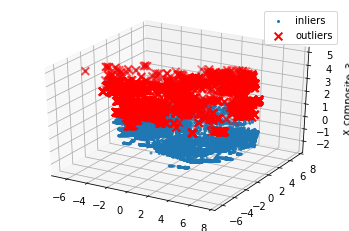

In [66]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=3)  # Reduce to k=3 dimensions
scaler = StandardScaler()
#normalize the metrics
X = scaler.fit_transform(data_vehicle)
X_reduce = pca.fit_transform(X)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel("x_composite_3")

ax.scatter(X_reduce[:, 0], X_reduce[:, 1], zs=X_reduce[:, 2], s=4, lw=1, label="inliers",cmap="jet")
# Plot x's for the ground truth outliers
#print(len(outlier_index))
print(X_reduce.shape)
ax.scatter(X_reduce[outlier_index,0],X_reduce[outlier_index,1], X_reduce[outlier_index,2],
          lw=2, s=60, marker="x", c="red", label="outliers")
ax.legend()
plt.show()

In [ ]:
plt.figure(figsize=(12,8))
plt.hist(X);
plt.title('Histogram of Avg Anomaly Scores: Lower => More Anomalous')

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
cmap=np.array(['white','red'])
ax.scatter(X.loc[:,'vehicle_id'],X.loc[:,'operation_time'], X.loc[:,'operation_distance'],c='white',s=20,edgecolor='k')
ax.scatter(if_anomalies.loc[:,'vehicle_id'],if_anomalies.loc[:,'operation_time'], if_anomalies.loc[:,'operation_distance'],c='red')
ax.xlabel('Income')
ax.ylabel('Spend_Score')
ax.zlabel('Spend_Score')
plt.title('Isolation Forests - Anomalies')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

x = np.random.rand(20)
y = np.random.rand(20)
z = x*y

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z,
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200,
           c=z)
plt.show()

In [ ]:

from sklearn.ensemble import IsolationForest
rs=np.random.RandomState(0)
clf = IsolationForest(max_samples='auto',random_state=rs, contamination=.1) 
clf.fit(newdata)
if_scores = clf.decision_function(newdata)
if_anomalies=clf.predict(newdata)
if_anomalies=pd.Series(if_anomalies).replace([-1,1],[1,0])
if_anomalies=data_vehicle[if_anomalies==1];

In [ ]:
'''plt.figure(figsize=(12,8))
plt.hist(if_scores);
plt.title(‘Histogram of Avg Anomaly Scores: Lower => More Anomalous’);

In [ ]:
'''cmap=np.array(['white','red'])
plt.scatter(data_vehicle.loc[:,'vehicle_id'],data_vehicle.loc[:,'operation_time'],c='white',s=20,edgecolor='k')
plt.scatter(if_anomalies.loc[:,'vehicle_id'],if_anomalies.loc[:,'operation_time'],c='red')
plt.xlabel('Income')
plt.ylabel('Spend_Score')
plt.title('Isolation Forests - Anomalies')